<a href="https://colab.research.google.com/github/saadkarim754/Fake_News_classification/blob/main/fake_news_detection_using_gradient_boosting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report ,log_loss, precision_score, recall_score
import re
import string
import chardet

In [2]:
with open("True.csv", 'rb') as rawdata:
       result = chardet.detect(rawdata.read(100000)) # Read a large portion of the file for better detection

print(result['encoding']) # Print the detected encoding

MacRoman


In [3]:
data_fake = pd.read_csv("Fake.csv")
data_true = pd.read_csv("True.csv", encoding ='MacRoman')

In [4]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [5]:
data_true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,31-Dec-17
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,29-Dec-17
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,31-Dec-17
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,30-Dec-17
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,29-Dec-17


by this stage we have loaded the data

by now our datasets have , 5 coloumns , we add a new column the label i.e 0 or 1.

In [6]:
data_fake["class"]=0
data_true["class"]=1

In [7]:
data_fake.shape,data_true.shape

((23481, 5), (21432, 5))

first number is the rows and second is the column\
now we will remove , the last entries of both csv files for later testing

In [8]:
data_fake_manual_testing = data_fake.tail(10)
for i in range(23480,21000,-1):
    data_fake.drop([i],axis=0,inplace=True)

data_true_manual_testing = data_true.tail(10)
for i in range(21416,21000,-1):
    data_true.drop([i],axis=0,inplace=True)

In [9]:
data_fake.shape,data_true.shape

((21001, 5), (21016, 5))

as u can see 10 rows have been deducted from both csvs.

In [10]:
data_fake_manual_testing.head(1)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",0


In [11]:
data_true_manual_testing.head(1)

,title,text,subject,date,class
21422,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,22-Aug-17,1


so at this point we have seperated two mini datasets for later **testing**\
now we will create a new dataset , that will have both the true and the fake data sets

In [12]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [13]:
data_merge.tail(10)

,title,text,subject,date,class
21422,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,22-Aug-17,1
21423,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21424,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,22-Aug-17,1
21425,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,22-Aug-17,1
21426,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,21-Aug-17,1
21427,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,22-Aug-17,1
21428,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,22-Aug-17,1
21429,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,22-Aug-17,1
21430,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,22-Aug-17,1
21431,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,22-Aug-17,1


now in the next step we remove the columns that are not required

In [14]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

In [15]:
data = data_merge.drop(['title','subject','date'],axis=1)

In [16]:
data.head()

,text,class
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


as u can see we only have the text and class columns

In [17]:
data.isnull().sum()

,0
text,0
class,0


now we have to randomly shuffle our data

In [18]:
data = data.sample(frac = 1)

In [19]:
data.head(10)

,text,class
9329,We reported earlier today that Chuck and Nanc...,0
8923,WASHINGTON - Republican Donald Trump said on T...,1
16024,ASTANA (Reuters) - Syrian groups who choose to...,1
12060,President Obama said in an interview released ...,0
10073,Marcus Lemonis has no problem with some custom...,0
9763,WASHINGTON (Reuters) - U.S. House Speaker Paul...,1
16069,The word nothing-burger has been tossed arou...,0
5955,The Republican Party may have done more than s...,0
7047,Ivanka Trump s stab at using her dad s name to...,0
9461,WASHINGTON (Reuters) - The U.S. House panel in...,1


as u can see the indexing is not right now we have to fix that


In [20]:
data.reset_index(inplace=True)

In [21]:
data.head(10)

,index,text,class
0,9329,We reported earlier today that Chuck and Nanc...,0
1,8923,WASHINGTON - Republican Donald Trump said on T...,1
2,16024,ASTANA (Reuters) - Syrian groups who choose to...,1
3,12060,President Obama said in an interview released ...,0
4,10073,Marcus Lemonis has no problem with some custom...,0
5,9763,WASHINGTON (Reuters) - U.S. House Speaker Paul...,1
6,16069,The word nothing-burger has been tossed arou...,0
7,5955,The Republican Party may have done more than s...,0
8,7047,Ivanka Trump s stab at using her dad s name to...,0
9,9461,WASHINGTON (Reuters) - The U.S. House panel in...,1


In [22]:
data.drop(["index"],axis=1,inplace=True)

now as u can see we , have reset the index but the previous index
still stays , so now we have to remove that

In [23]:
data.head(10)

,text,class
0,We reported earlier today that Chuck and Nanc...,0
1,WASHINGTON - Republican Donald Trump said on T...,1
2,ASTANA (Reuters) - Syrian groups who choose to...,1
3,President Obama said in an interview released ...,0
4,Marcus Lemonis has no problem with some custom...,0
5,WASHINGTON (Reuters) - U.S. House Speaker Paul...,1
6,The word nothing-burger has been tossed arou...,0
7,The Republican Party may have done more than s...,0
8,Ivanka Trump s stab at using her dad s name to...,0
9,WASHINGTON (Reuters) - The U.S. House panel in...,1


now weve got a properly formated dataset\
now , , we will pre-process the data set with a function

In [24]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

so we now apply this function on our data variable , on its text column

In [25]:
data['text']=data['text'].apply(wordopt)

In [26]:
data.head(10)

,text,class
0,we reported earlier today that chuck and nanc...,0
1,washington republican donald trump said on t...,1
2,astana reuters syrian groups who choose to...,1
3,president obama said in an interview released ...,0
4,marcus lemonis has no problem with some custom...,0
5,washington reuters u s house speaker paul...,1
6,the word nothing burger has been tossed arou...,0
7,the republican party may have done more than s...,0
8,ivanka trump s stab at using her dad s name to...,0
9,washington reuters the u s house panel in...,1


as u can see the data is pre-processed now \
now we create the x and y variables

In [27]:
x = data['text']
y = data['class']

now we separate our data for training and testing

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
GB = GradientBoostingClassifier(random_state=0)
GB.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

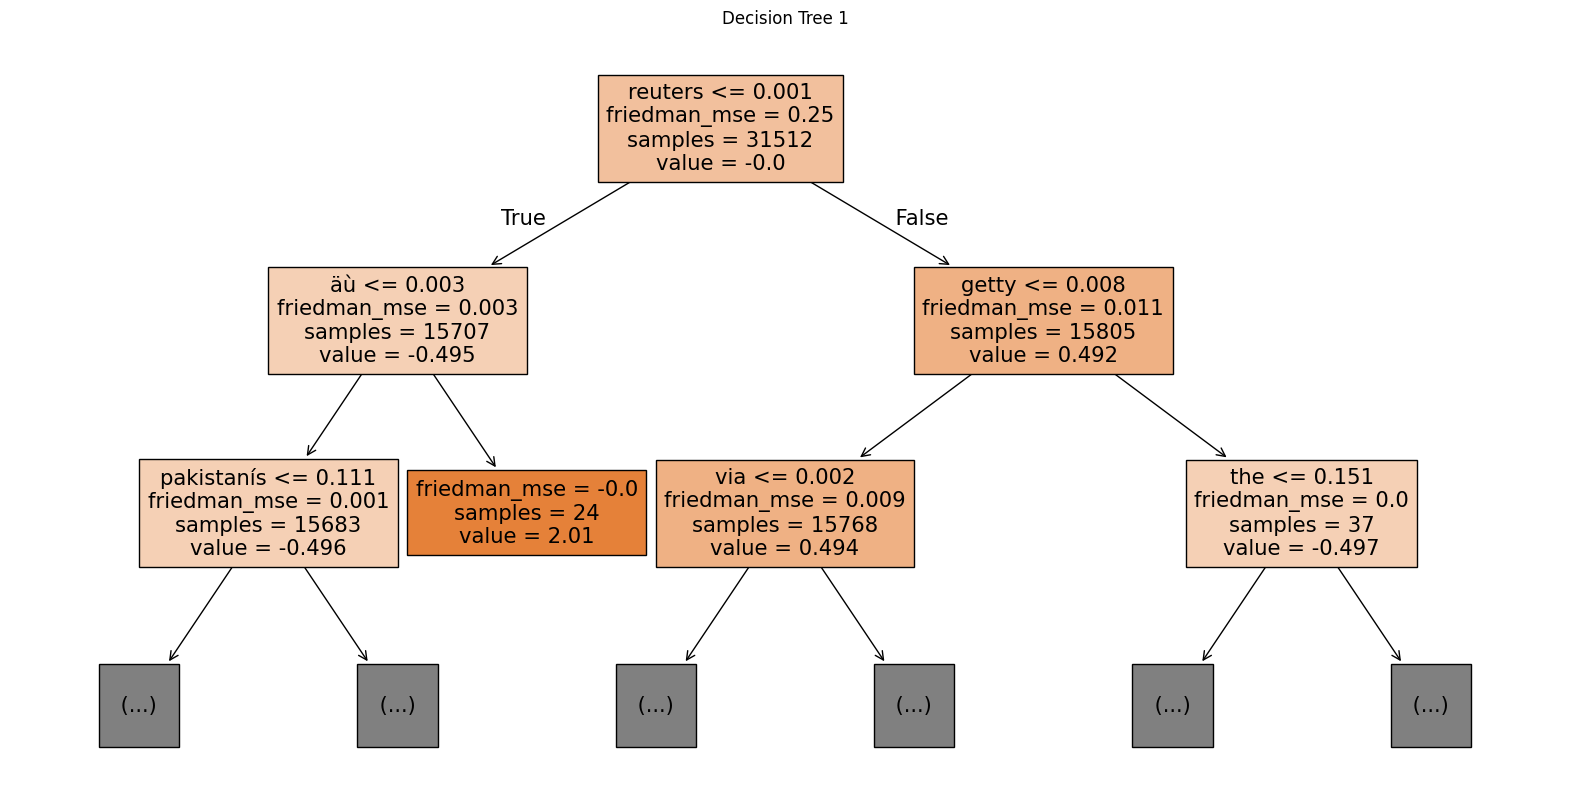

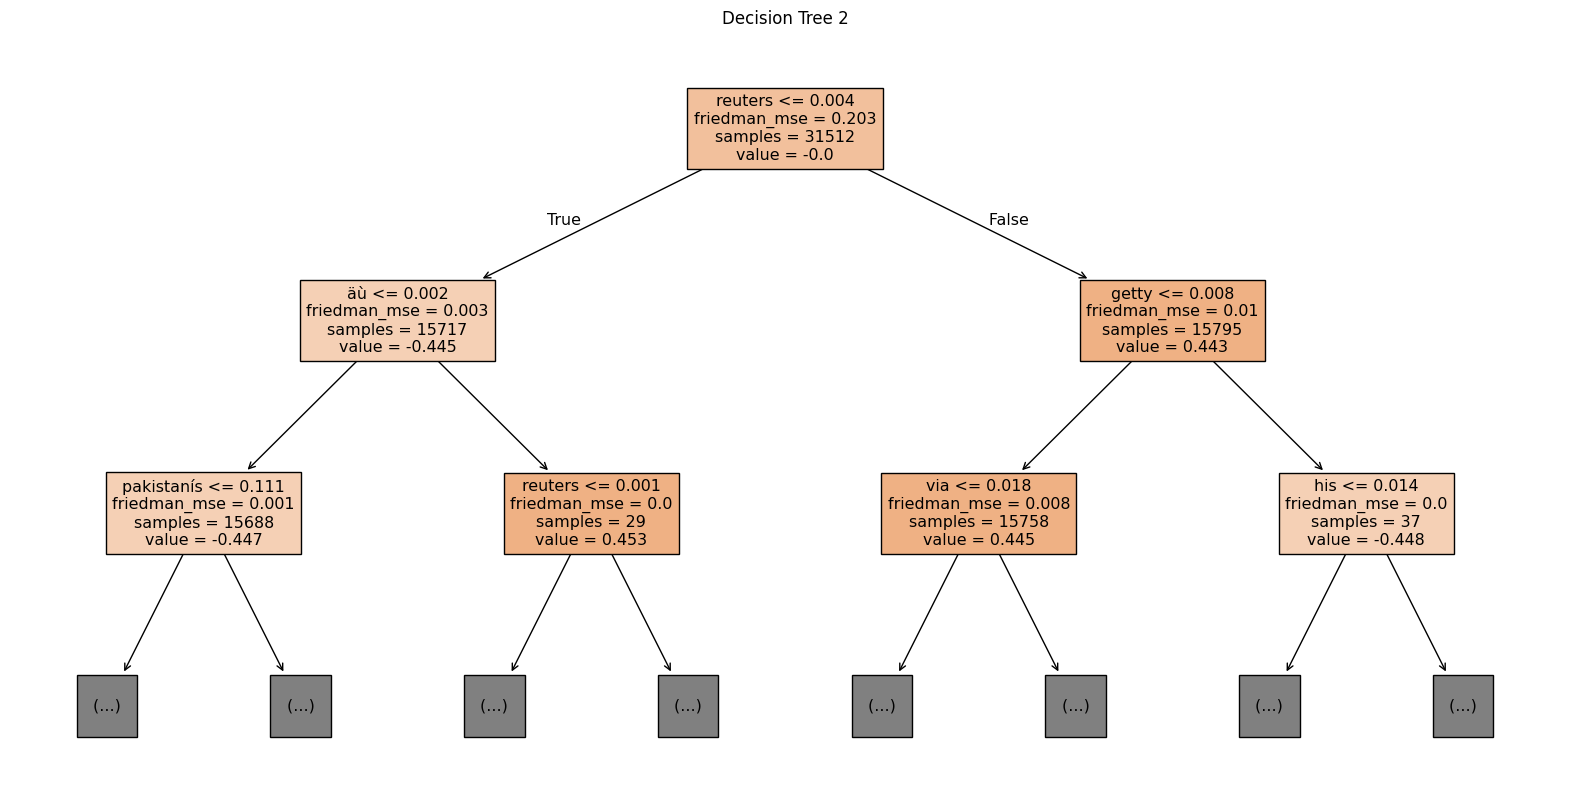

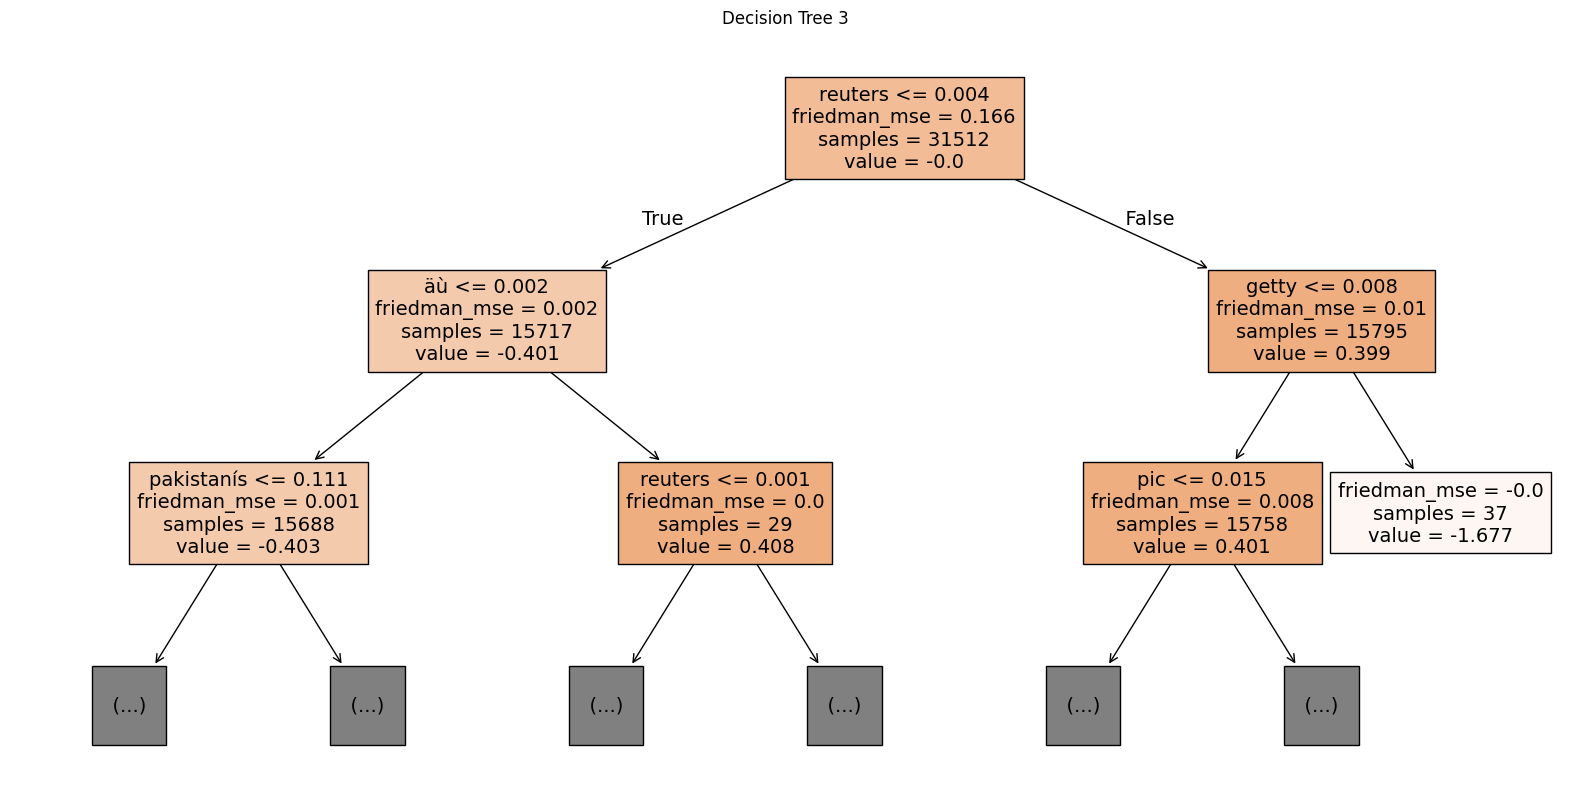

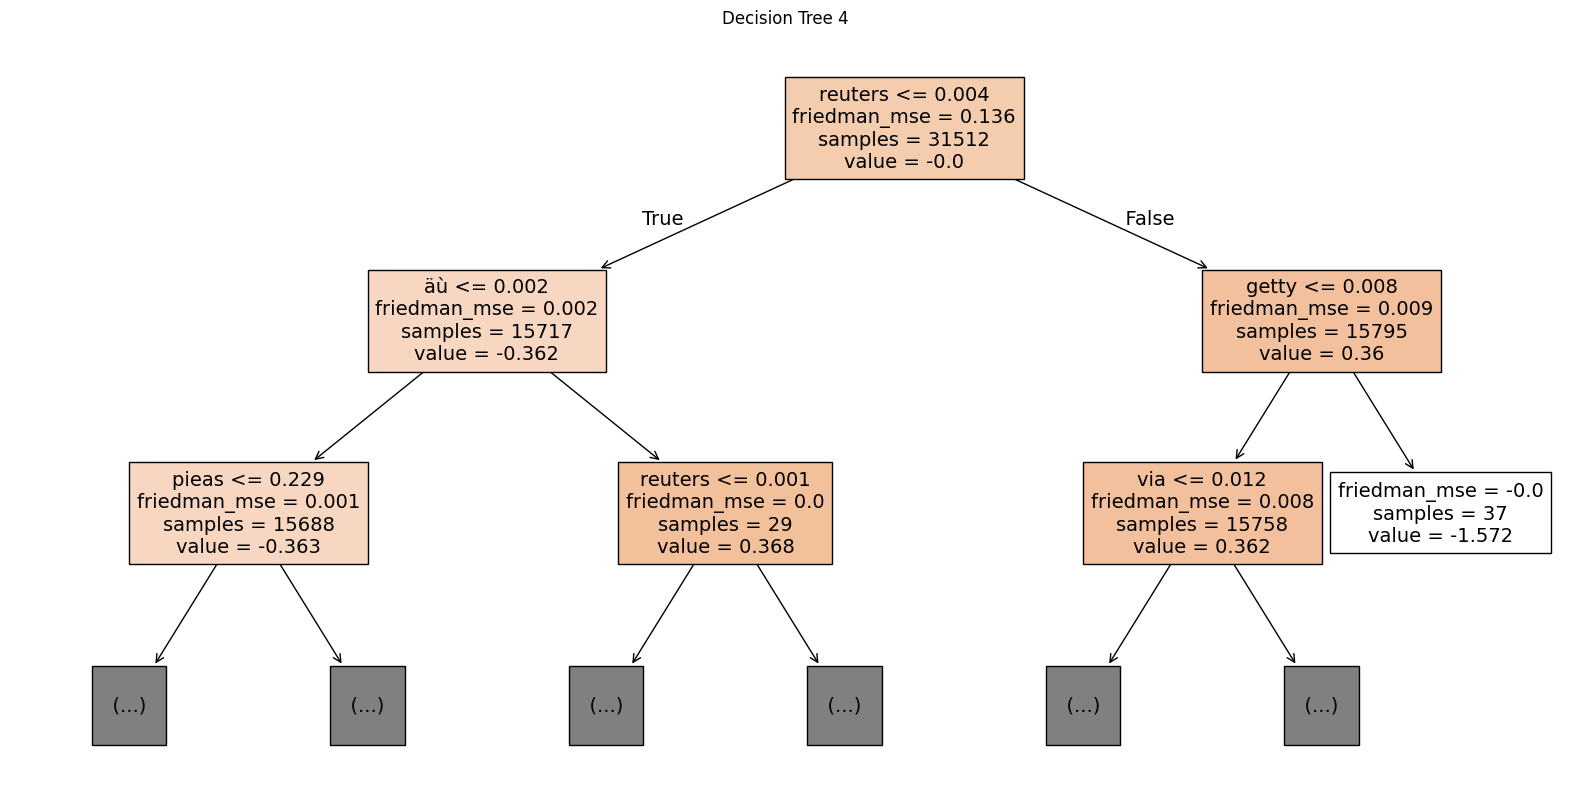

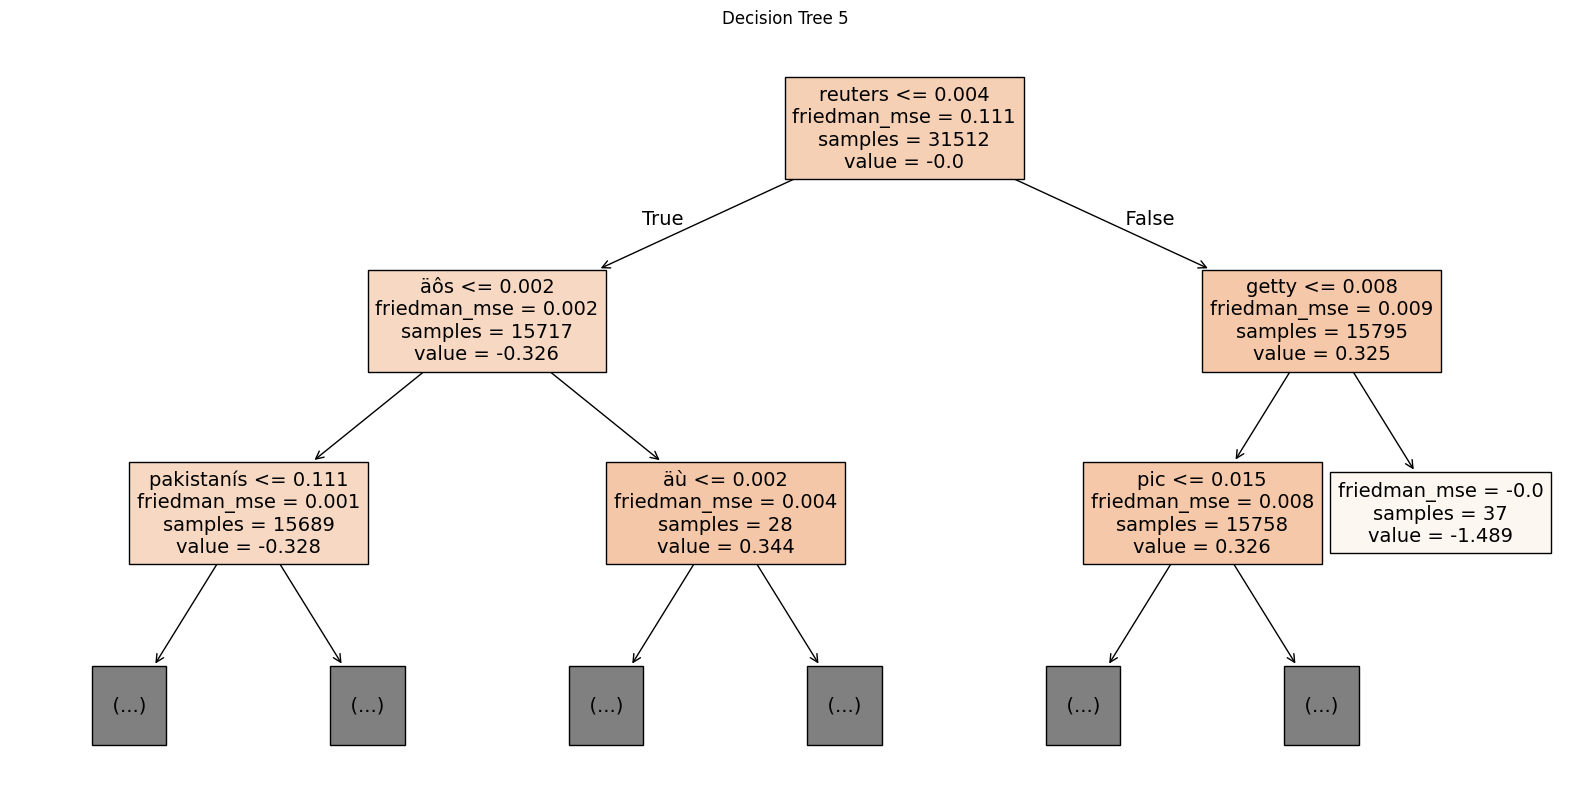

In [31]:
# prompt: can u make a graph of the gradient boosting classifier

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming 'GB' is your trained GradientBoostingClassifier
# You can visualize individual trees within the ensemble
for i in range(min(5, GB.n_estimators)): # Visualize the first 5 trees (or fewer if n_estimators is smaller)
    plt.figure(figsize=(20,10))
    plot_tree(GB.estimators_[i][0], filled=True, feature_names=vectorization.get_feature_names_out(), max_depth=2) # Limit depth for readability
    plt.title(f"Decision Tree {i+1}")
    plt.show()

by now we have a fitted model

In [32]:
predict_gb = GB.predict(xv_test)

In [ ]:
GB.score(xv_test, y_test)

0.9963826749167063

In [33]:
print(classification_report(y_test, predict_gb))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5163
           1       0.99      1.00      1.00      5342

    accuracy                           1.00     10505
   macro avg       1.00      1.00      1.00     10505
weighted avg       1.00      1.00      1.00     10505



now we will manual testing of our model

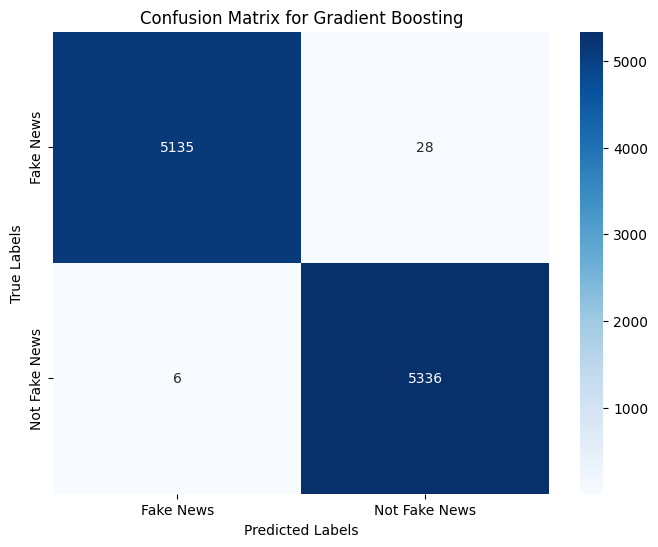

In [34]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test, predict_gb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Fake News", "Not Fake News"], yticklabels=["Fake News", "Not Fake News"])
plt.title("Confusion Matrix for Gradient Boosting")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [35]:
def output_lable(n):
    if n == 0:
        return "Fake News"
    elif n == 1:
        return "Not A Fake News"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_GB = GB.predict(new_xv_test)
    return print("\n\nGB Prediction: {} ".format(output_lable(pred_GB[0])))

now the above function will take some news from us, pre-process it and give it to GB.predict function

In [36]:
news = str(input())
manual_testing(news)

SHANGHAI (Reuters) – Amy Chen, co-founder of China’s leading AI firm VisionTech, passed away on Thursday at 54. Chen was found unconscious in her apartment in Pudong, with preliminary reports citing natural causes. Known for her innovation in artificial intelligence, Chen played a pivotal role in modernizing China's tech industry. VisionTech faced controversy in recent years over alleged misuse of government AI funding, though Chen was never implicated. Once among China’s wealthiest women, Chen’s fortune dwindled after legal battles. She leaves behind her husband and daughter.


GB Prediction: Not A Fake News 


In [37]:
news = str(input())
manual_testing(news)

JOHANNESBURG (Reuters) – Thabo Dlamini, the founder of infrastructure giant BuildAfrica, died unexpectedly on Friday at the age of 67. Dlamini suffered a fatal stroke at his Johannesburg residence, a spokesperson confirmed. Rising from humble beginnings, Dlamini's company spearheaded major housing projects across the continent. Despite his successes, BuildAfrica was implicated in a 2019 corruption investigation involving government tenders, leading to significant financial losses. Dlamini is survived by his wife, two sons, and a legacy of transformative but controversial development.


GB Prediction: Not A Fake News 


In [38]:
news = str(input())
manual_testing(news)

WASHINGTON (Reuters) – Scientists in Antarctica claim to have uncovered a mysterious object emitting radio signals. Some speculate it’s of alien origin, but no confirmation has been made.


GB Prediction: Not A Fake News 


In [39]:
news = str(input())
manual_testing(news)

DUBAI (Reuters) – Dubai police arrested a man who claimed to be a time traveler after he earned $2 billion through “impossible” stock predictions. Authorities are investigating.


GB Prediction: Not A Fake News 


In [42]:
news = str(input())
manual_testing(news)

ANTARCTICA – Scientists claim to have found an alien artifact in ice.


GB Prediction: Fake News 


In [41]:
news = str(input())
manual_testing(news)

GENEVA – A billionaire says he teleported a human. Experts doubt it.


GB Prediction: Fake News 
